___

___
# Linear Regression Project 


## Imports
** Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/yongholim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Get the Data

In [2]:
Performance = pd.read_csv("StudentsPerformance.csv")

**Checking the data 

In [4]:
Performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
Performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
Performance.info()
Performance.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Exploratory Data Analysis


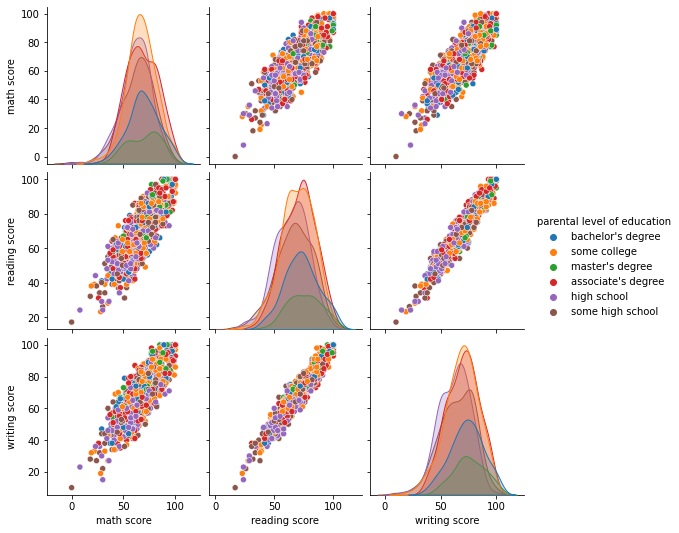

In [14]:
sns.pairplot(Performance, hue='parental level of education')

In [45]:
#some modification on the level of education. 

index_education = Performance['parental level of education'].drop_duplicates()

print(index_education)




0      bachelor's degree
1           some college
2        master's degree
3     associate's degree
8            high school
15      some high school
Name: parental level of education, dtype: object


["bachelor's degree", 'some college', "master's degree", "associate's degree"]

In [52]:
Performance['parental level of education'] = Performance['parental level of education'].replace({"bachelor's degree" : "Higher Education"})
Performance['parental level of education'] = Performance['parental level of education'].replace({"some college" : "Higher Education"})
Performance['parental level of education'] = Performance['parental level of education'].replace({"master's degree" : "Higher Education"})
Performance['parental level of education'] = Performance['parental level of education'].replace({"associate's degree" : "Higher Education"})
Performance['parental level of education'] = Performance['parental level of education'].replace({"some high school" : "high school"})
Performance['parental level of education'] = Performance['parental level of education'].replace({"High school" : "high school"})
Performance['parental level of education'].value_counts()

Higher Education    625
high school         375
Name: parental level of education, dtype: int64

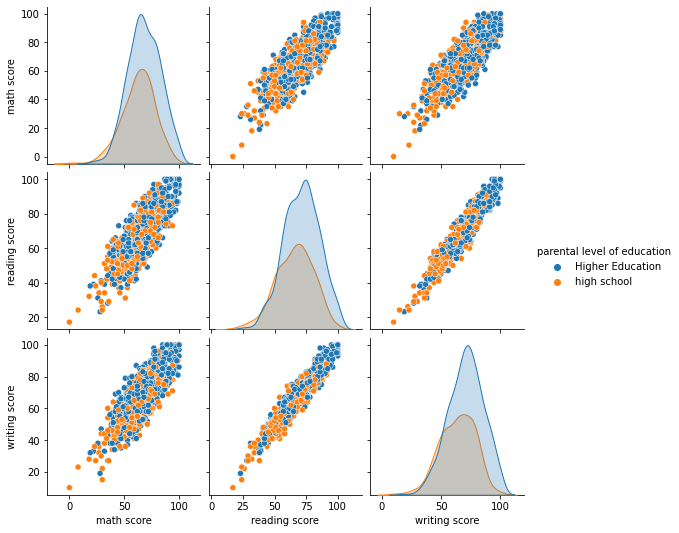

In [53]:
sns.pairplot(Performance, hue='parental level of education')

## Training and Testing Data


In [99]:
y = Performance['math score']

In [78]:
X = Performance['parental level of education']
X = pd.get_dummies(data=X)
X['reading score'] = Performance['reading score']
X['writing score'] = Performance['writing score']
X.head()



,Higher Education,high school,reading score,writing score
0,1,0,72,74
1,1,0,90,88
2,1,0,95,93
3,1,0,57,44
4,1,0,78,75


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [81]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [82]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [83]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [84]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.14800948  0.14800948  0.65210642  0.21167196]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [88]:
predictions = lm.predict( X_test)

** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

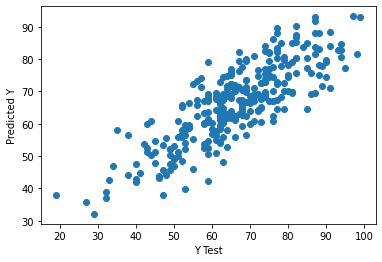

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [106]:
X_test.columns


Index(['Higher Education', 'high school', 'reading score', 'writing score'], dtype='object')

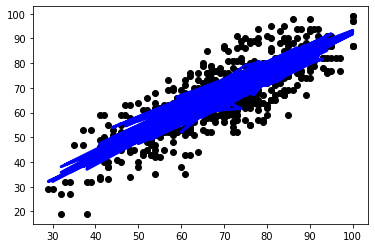

In [108]:
# Plot outputs 1
plt.scatter(X_test['reading score'], y_test, color="black")
plt.plot(X_test['reading score'], predictions, color="blue", linewidth=3)


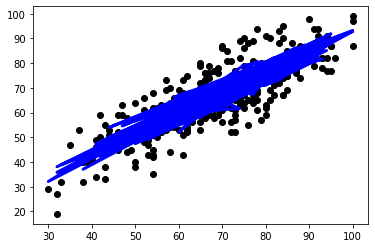

In [109]:
# Plot outputs 2
plt.scatter(X_test['writing score'], y_test, color="black")
plt.plot(X_test['writing score'], predictions, color="blue", linewidth=3)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [98]:
# calculate these metrics by hand!
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


# predicting the accuracy score
score=r2_score(y_test,predictions)
print("r2 socre is ",score)

MAE: 6.38783625172722
MSE: 62.971960479113235
RMSE: 7.935487412825581
r2 socre is  0.680651578119108


## Residuals


**Plot a histogram of the residuals **

/Users/yongholim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


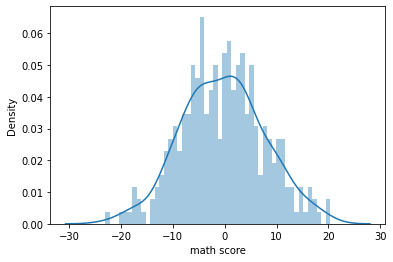

In [92]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion


In [93]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Higher Education,-0.148009
high school,0.148009
reading score,0.652106
writing score,0.211672
